In [1]:
#!pip install geopandas==0.3.0
#!pip install pyshp==1.2.10
#!pip install shapely==1.6.3

# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt


import plotly.plotly as py
import plotly.figure_factory as ff
import plotly

plotly.tools.set_credentials_file(username='alex_chao', api_key='fF08LLYn9u6pfKc8MdBL')

In [2]:
# Read in cleaned zillow data
file_4 = "Zillow_data_cleaned_NC_AC.csv"
clean_df = pd.read_csv(file_4, encoding="utf-8")
clean_df.head()

# Read in county FIPS id's
file_5 = "USA_county_FIPS.csv"
fips_df = pd.read_csv(file_5, encoding="utf-8")
fips_df.head()

# Add index to data dataframe
clean_df.index = clean_df['Date']

# Separate dataframe by the types of data in the column header
price_df = clean_df.filter(regex='Price')
day_df = clean_df.filter(regex='Day')
sales_df = clean_df.filter(regex='Sale')

# Select for only NC counties in the county FIPS id's
fips_df = fips_df[fips_df['State'] == 'NC']

fips_df.head()

,FIPS,Name,State
1887,37001,Alamance,NC
1888,37003,Alexander,NC
1889,37005,Alleghany,NC
1890,37007,Anson,NC
1891,37009,Ashe,NC


In [3]:
# Break up dataframe into two dataframes, 2015-present and 2018-present
day_2015 = day_df.filter(regex='201[5-7]', axis=0)
day_2018 = day_df.filter(regex='201[8-9]', axis=0)
day_2018.head()

,Mecklenburg CountyDay,Wake CountyDay,Guilford CountyDay,Forsyth CountyDay,Cumberland CountyDay,Durham CountyDay,Buncombe CountyDay,Gaston CountyDay,New Hanover CountyDay,Union CountyDay,...,Hoke CountyDay,Davie CountyDay,Pasquotank CountyDay,Jackson CountyDay,Person CountyDay,Alexander CountyDay,Macon CountyDay,Cherokee CountyDay,Currituck CountyDay,Polk CountyDay
Date,,,,,,,,,,,,,,,,,,,,,
2018-01,71.0,68.0,86.0,96.0,123.0,59.0,96.0,72.0,105.0,82.0,...,125.0,NaN,97.5,NaN,NaN,NaN,275.5,NaN,197.0,NaN
2018-02,63.0,60.0,88.0,102.0,135.0,70.0,112.0,88.0,106.0,79.0,...,85.0,NaN,128.0,NaN,NaN,NaN,196.0,NaN,195.0,NaN
2018-03,49.0,49.0,75.0,66.0,119.0,45.0,63.0,59.0,82.0,66.5,...,76.0,NaN,100.0,NaN,NaN,NaN,225.0,NaN,161.0,NaN
2018-04,47.0,51.0,64.0,60.0,117.0,46.0,63.0,56.0,61.0,56.0,...,102.5,NaN,120.5,NaN,NaN,NaN,177.0,NaN,125.0,NaN
2018-05,50.0,52.0,58.0,61.0,96.0,47.0,61.0,56.0,71.0,56.0,...,98.5,NaN,87.0,NaN,NaN,NaN,179.0,NaN,111.0,62.0


Text(0, 0.5, 'Days on Zillow')

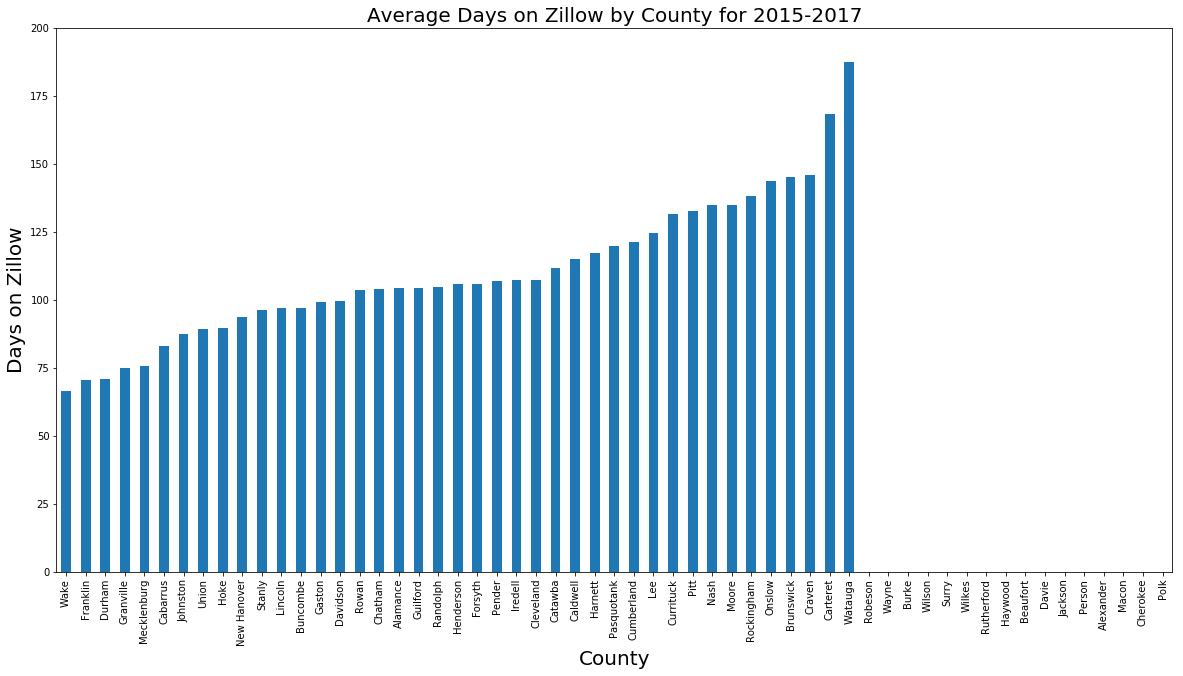

In [26]:
# Get mean days values from days dataframes
day_2015_mean = day_2015.mean()

# Sort days means
day_2015_mean = day_2015_mean.sort_values(ascending=True)

# Clean up series indices
day_2015_mean.index = day_2015_mean.index.map(lambda x: str(x)[:-10])

# Plot days means
day_2015_mean.plot('bar', figsize=(20,10))
plt.title('Average Days on Zillow by County for 2015-2017', fontsize=20)
plt.xlabel('County', fontsize=20)
plt.ylim(0, 200)
plt.ylabel('Days on Zillow', fontsize=20)


Text(0, 0.5, 'Days on Zillow')

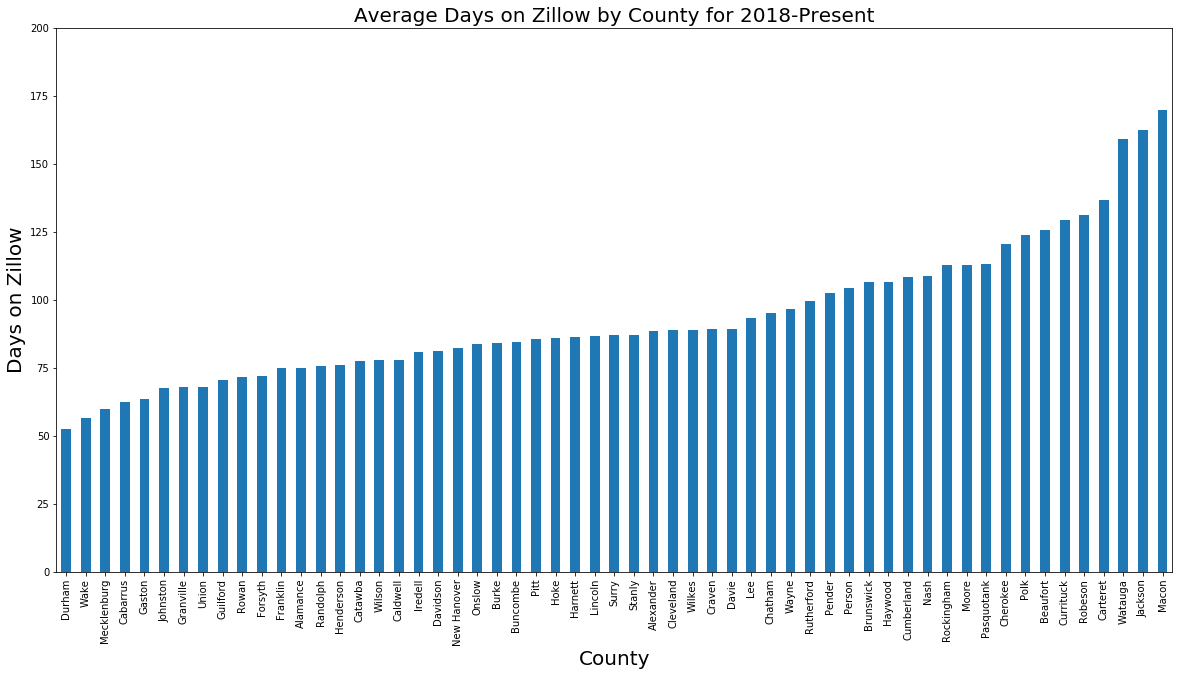

In [27]:
# Get mean days values from days dataframes
day_2018_mean = day_2018.mean()

# Sort days means
day_2018_mean = day_2018_mean.sort_values(ascending=True)

# Clean up series indices
day_2018_mean.index = day_2018_mean.index.map(lambda x: str(x)[:-10])

# Plot days means
day_2018_mean.plot('bar', figsize=(20,10))
#day_2015_mean.plot('bar', figsize=(20,10), color='blue', alpha=0.5)
plt.title('Average Days on Zillow by County for 2018-Present', fontsize=20)
plt.xlabel('County', fontsize=20)
plt.ylim(0, 200)
plt.ylabel('Days on Zillow', fontsize=20)

In [18]:
# Combine the two day time series into a dataframe and sort

day_2015_2018 = pd.concat([day_2015_mean, day_2018_mean], axis=1)
day_2015_2018.columns = ['2015-2017', '2018-2019']
day_2015_2018.sort_values('2018-2019', ascending=True, inplace=True)


C:\Users\Alex\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,2015-2017,2018-2019
Durham,70.902778,52.718750
Wake,66.513889,56.750000
Mecklenburg,75.666667,59.937500
Cabarrus,83.222222,62.343750
Gaston,99.347222,63.531250
Johnston,87.375000,67.687500
Granville,75.000000,67.843750
Union,89.361111,67.968750
Guilford,104.597222,70.406250
Rowan,103.517857,71.562500


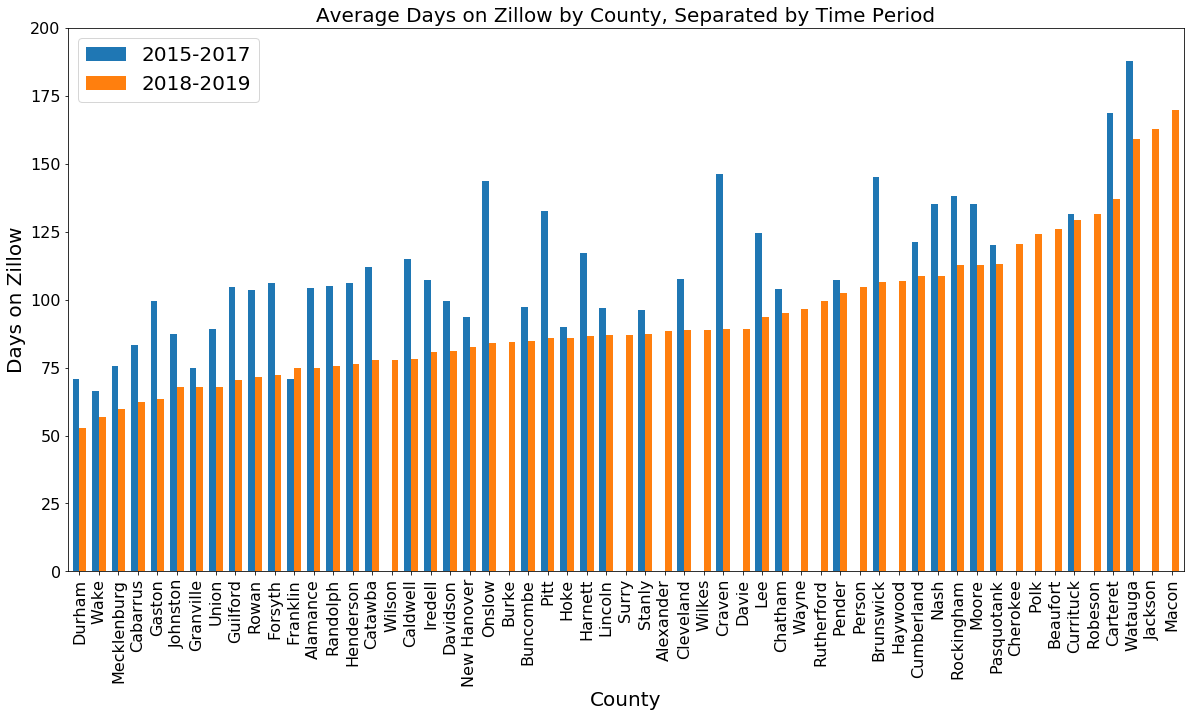

In [36]:
#Plot comparison of days on zillow for the two time periods

fig = day_2015_2018[['2015-2017','2018-2019']].plot(kind='bar', figsize=(20, 10), legend=True, fontsize=16, width=0.7)
plt.title('Average Days on Zillow by County, Separated by Time Period', fontsize=20)
plt.xlabel('County', fontsize=20)
plt.ylim(0, 200)
plt.ylabel('Days on Zillow', fontsize=20)
plt.legend(fontsize=20)

In [58]:
# Get mean of all counties
day_df['mean'] = day_df.mean(axis=1)

# Transform mean into rolling mean

day_df['rolling_mean'] = day_df['mean'].rolling(12).mean()

day_df.head()

,Mecklenburg CountyDay,Wake CountyDay,Guilford CountyDay,Forsyth CountyDay,Cumberland CountyDay,Durham CountyDay,Buncombe CountyDay,Gaston CountyDay,New Hanover CountyDay,Union CountyDay,...,Pasquotank CountyDay,Jackson CountyDay,Person CountyDay,Alexander CountyDay,Macon CountyDay,Cherokee CountyDay,Currituck CountyDay,Polk CountyDay,mean,rolling_mean
Date,,,,,,,,,,,,,,,,,,,,,
2010-01,151.0,185.0,155.0,172.5,143.0,117.0,NaN,NaN,NaN,171.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.187500,NaN
2010-02,166.0,169.0,160.0,196.0,91.0,126.0,NaN,NaN,NaN,203.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159.187500,NaN
2010-03,151.0,156.0,153.0,188.0,107.0,152.0,NaN,133.0,NaN,184.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.055556,NaN
2010-04,155.0,158.0,166.0,231.0,133.0,156.0,NaN,125.0,NaN,222.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.444444,NaN
2010-05,132.0,157.0,160.0,186.0,110.0,101.0,NaN,131.5,NaN,210.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.000000,NaN


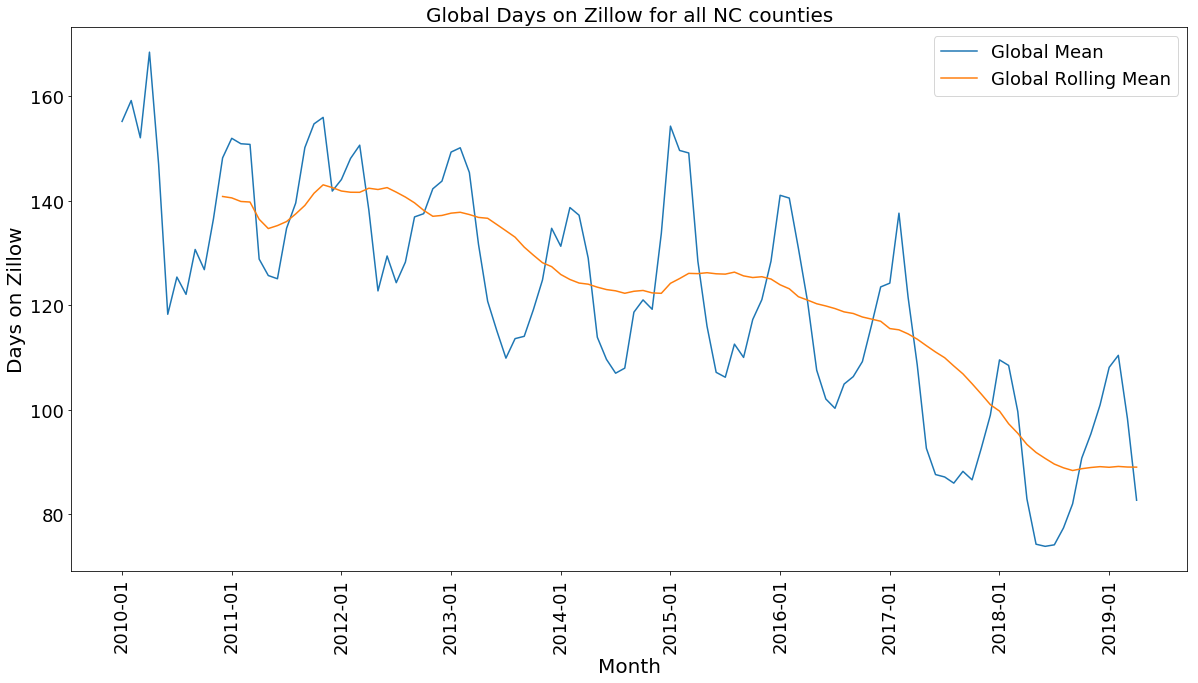

In [59]:
# Plot 

plt.figure(figsize=(20,10))

plt.plot(day_df['mean'], label='Global Mean')
plt.plot(day_df['rolling_mean'], label='Global Rolling Mean')

plt.title('Global Days on Zillow for all NC counties', fontsize=20)
plt.xlabel('Month', fontsize=20)
plt.xticks(day_df.index[::12], rotation='vertical', fontsize=18)
plt.ylabel('Days on Zillow', fontsize=20)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

# Generate smoothing trend line

In [38]:
# Select only most recent two years for days data
day_2018 = day_df.filter(regex='201[8-9]', axis=0)

# Get mean of days data
day_2018_mean = day_2018.mean()

# Conert series to dataframe
day_mean_df = pd.DataFrame({'Name':day_2018_mean.index, 'Days':day_2018_mean.values})

# Remoe extra alues from county descriptor
day_mean_df['Name'] = day_mean_df['Name'].str.replace(' CountyDay', '')

# Merge FIPS codes based on county name
day_mean_df = pd.merge(day_mean_df, fips_df, how='left', on='Name')

# Get rid of mean row
day_mean_df = day_mean_df[day_mean_df['Name'] != 'mean']
day_mean_df = day_mean_df[day_mean_df['Name'] != 'rolling_mean']

In [39]:
# Plot NC map data for days for each county

fig = ff.create_choropleth(fips=day_mean_df['FIPS'], values=day_mean_df['Days'], scope=['NC'])
#py.iplot(fig, scope='NC')

py.iplot(fig, filename='choropleth_north_carolina')

C:\Users\Alex\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~alex_chao/0 or inside your plot.ly account where it is named 'choropleth_north_carolina'


C:\Users\Alex\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [40]:
# Select only the most recent two years for sales and pricing data
sales_2018 = sales_df.filter(regex='201[8-9]', axis=0)
price_2018 = price_df.filter(regex='201[8-9]', axis=0)

# Get mean of sales and pricing data
sales_mean = sales_2018.mean()
price_mean = price_2018.mean()


# Conert series to dataframe
sales_mean_df = pd.DataFrame({'Name':sales_mean.index, 'Sales':sales_mean.values})
price_mean_df = pd.DataFrame({'Name':price_mean.index, 'Price':price_mean.values})

# Remoe extra alues from county descriptor
sales_mean_df['Name'] = sales_mean_df['Name'].str.replace(' CountySale', '')
price_mean_df['Name'] = price_mean_df['Name'].str.replace(' CountyPrice', '')


# Merge FIPS codes based on county name
sales_mean_df = pd.merge(sales_mean_df, fips_df, how='left', on='Name')
price_mean_df = pd.merge(price_mean_df, fips_df, how='left', on='Name')

# Get rid of mean row
sales_mean_df = sales_mean_df[sales_mean_df['Name'] != 'mean']
price_mean_df = price_mean_df[price_mean_df['Name'] != 'mean']


In [41]:
# Plot NC map data for sales for each county
fig = ff.create_choropleth(fips=sales_mean_df['FIPS'], values=sales_mean_df['Sales'], scope=['NC'])


py.iplot(fig, filename='choropleth_north_carolina')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~alex_chao/0 or inside your plot.ly account where it is named 'choropleth_north_carolina'


In [42]:
# Plot NC map data for pricing for each county
fig = ff.create_choropleth(fips=price_mean_df['FIPS'], values=price_mean_df['Price'], scope=['NC'])

py.iplot(fig, filename='choropleth_north_carolina')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~alex_chao/0 or inside your plot.ly account where it is named 'choropleth_north_carolina'
